# Actor-Critic


## Import

In [17]:
# !pip install highway-env
# !pip install git+https://github.com/DLR-RM/stable-baselines3

import gymnasium as gym
import numpy as np
from stable_baselines3 import A2C
import highway_env

In [18]:
from stable_baselines3.common.evaluation import evaluate_policy

In [19]:
import matplotlib.pyplot as plt

## Build model

In [27]:
env = gym.make('intersection-v0')

model = A2C('MlpPolicy',
            env,
            learning_rate=5e-4,
            n_steps=5,
            gamma=0.99,
            gae_lambda=1,
            ent_coef=0.01,
            vf_coef=0.5,
            max_grad_norm=0.5,
            rms_prop_eps=1e-5,
            use_rms_prop=True,
            policy_kwargs=dict(net_arch=[128, 128])) 

model.learn(total_timesteps=10000)

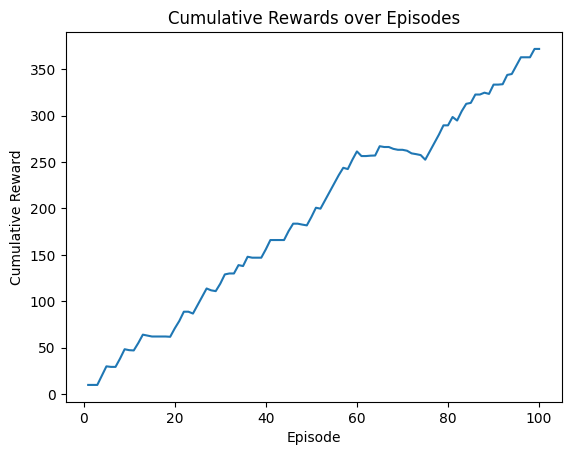

In [28]:
episodes = 100
rewards = []
cumulative_rewards = 0

for i in range(episodes):
    obs = env.reset()
    done = truncated = False
    episode_reward = 0
    
    while not done:
        action = int(model.predict(obs[0], deterministic=False)[0])
        next_obs, reward, done, truncated, info = env.step(action)
        episode_reward += reward
    
    cumulative_rewards += episode_reward
    rewards.append(cumulative_rewards.tolist())
    
# print(rewards)
    
plt.plot(range(1, episodes+1), rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards over Episodes')
plt.show()

In [29]:
print(rewards[-1])

371.7216085525743


In [30]:
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)

print(f"Mean reward: {mean_reward:.4f}")
print(f"Std reward: {std_reward:.4f}")

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward: 4.3700
Std reward: 4.8900
